# COVID-19 Vaccine Distribution Analysis
This project will analyze Ontario's COVID-19 data by factoring in criteria such as “Age, Sex, Exposure Type, Location, Case Status” to get an understanding of how the COVID-19 vaccines should be distributed.

Our Data Set:

Covid Cases data set obtained from https://resources-covid19canada.hub.arcgis.com/datasets/compiled-covid-19-case-details-canada/data
Hypotheses: The approach for the analysis will focus on comparing different factors like “Age, Location, Case Status, Gender” and the correlation between them. We will use this data to predict how vaccination can be distributed to limit the mortality rate and the spreading of the disease

#1. Initiation 

In [ ]:
#1.1
# We will need to install following packages 
!pip install geopandas


In [ ]:

#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
!pip install adjustText

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split as tts
from sklearn.neighbors import KNeighborsClassifier as knc
from sklearn.preprocessing import LabelEncoder
import csv

import geopandas as gpd
from shapely.geometry import Point, Polygon
import adjustText as aT

#2. **Data Loading**

In [2]:
#2.1
data=pd.read_csv('Compiled_COVID-19_Case_Details__Canada.csv')
data = data[data['province_abbr'] == 'ON'] # We filter the data to ON
data

,ObjectId,row_id,date_reported,health_region,age_group,gender,exposure,case_status,latitude,longitude,province,province_abbr,hr_uid
0,1,500,2020/10/05 12:00:00,Grey Bruce Health Unit,40-49,Female,Not Reported,Recovered,44.408279,-81.008611,Ontario,ON,3533.0
1,2,501,2020/11/27 12:00:00,York Region Public Health Services,40-49,Female,Outbreak,Active,44.074977,-79.428212,Ontario,ON,3570.0
2,3,502,2020/11/27 12:00:00,Peel Public Health,50-59,Male,Not Reported,Active,43.761613,-79.813571,Ontario,ON,3553.0
3,4,503,2020/11/16 12:00:00,Peel Public Health,40-49,Female,Close Contact,Recovered,43.761613,-79.813571,Ontario,ON,3553.0
4,5,504,2020/11/30 12:00:00,Windsor-Essex County Health Unit,40-49,Male,Close Contact,Active,42.156423,-82.777533,Ontario,ON,3568.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127495,127496,125995,2020/09/28 12:00:00,Durham Region Health Department,50-59,Female,Close Contact,Recovered,44.035150,-78.882498,Ontario,ON,3530.0
127496,127497,125996,2020/11/23 12:00:00,Toronto Public Health,20-29,Male,Not Reported,Active,43.725845,-79.389558,Ontario,ON,3595.0
127497,127498,125997,2020/11/02 12:00:00,Toronto Public Health,30-39,Female,Not Reported,Recovered,43.725845,-79.389558,Ontario,ON,3595.0
127498,127499,125998,2020/11/11 12:00:00,Toronto Public Health,20-29,Female,Not Reported,Recovered,43.725845,-79.389558,Ontario,ON,3595.0


In [3]:
#2.2
#Get information about the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127309 entries, 0 to 127499
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ObjectId       127309 non-null  int64  
 1   row_id         127309 non-null  int64  
 2   date_reported  127309 non-null  object 
 3   health_region  127309 non-null  object 
 4   age_group      127309 non-null  object 
 5   gender         127309 non-null  object 
 6   exposure       127309 non-null  object 
 7   case_status    127309 non-null  object 
 8   latitude       127309 non-null  float64
 9   longitude      127309 non-null  float64
 10  province       127309 non-null  object 
 11  province_abbr  127309 non-null  object 
 12  hr_uid         127309 non-null  float64
dtypes: float64(3), int64(2), object(8)
memory usage: 13.6+ MB


In [4]:
#2.3
#Check for Null Values
data.isnull().sum()

ObjectId         0
row_id           0
date_reported    0
health_region    0
age_group        0
gender           0
exposure         0
case_status      0
latitude         0
longitude        0
province         0
province_abbr    0
hr_uid           0
dtype: int64

#3. **Data Exploration and Data  Cleansing**

In [5]:
#3.3
#Let's inspect some other columns 
data['age_group'].value_counts(normalize=True)


20-29           0.209969
30-39           0.156148
50-59           0.145386
40-49           0.141011
<20             0.122230
60-69           0.093450
80+             0.080748
70-79           0.050915
Not Reported    0.000141
Name: age_group, dtype: float64

In [6]:
#3.4
# Only 0.014 percent of the data has missing age group information. We will drop the data for our analysis.
data = data[data.age_group != 'Not Reported']
data['age_group'].value_counts(normalize=True)

20-29    0.209999
30-39    0.156170
50-59    0.145407
40-49    0.141031
<20      0.122247
60-69    0.093463
80+      0.080760
70-79    0.050923
Name: age_group, dtype: float64

In [7]:
#3.5
data['case_status'].value_counts(normalize=True)

Recovered    0.848261
Active       0.122106
Deceased     0.029633
Name: case_status, dtype: float64

Observation: About 85 % of the population recovered from Covid-19 and about 12% of the cases are active.

In [8]:
#3.6
data['exposure'].value_counts(normalize=True)
#35% of the exposure type data is Not Reported 

Close Contact     0.407782
Not Reported      0.353866
Outbreak          0.212097
Travel-Related    0.026255
Name: exposure, dtype: float64

In [9]:
#3.7
data['health_region'].value_counts(normalize=True)


Toronto Public Health                                       0.337518
Peel Public Health                                          0.221752
York Region Public Health Services                          0.093699
Ottawa Public Health                                        0.068937
Durham Region Health Department                             0.038746
Windsor-Essex County Health Unit                            0.031259
Region of Waterloo, Public Health                           0.031047
Halton Region Health Department                             0.029947
Hamilton Public Health Services                             0.028046
Simcoe Muskoka District Health Unit                         0.018289
Niagara Region Public Health Department                     0.017920
Middlesex-London Health Unit                                0.014007
Wellington-Dufferin-Guelph Public Health                    0.012090
Eastern Ontario Health Unit                                 0.007338
Haldimand-Norfolk Health Unit     

**Observation**: Toronto Public Health, Peel Public Health, York Region Public Health Services, Ottawa Public Health, Durham Region Health Department the five zones about reported 70% of the cases.

#4. **Data Enriching**

In [10]:
#4.1
data['month'] = pd.DatetimeIndex(data['date_reported']).month
data['week'] = pd.DatetimeIndex(data['date_reported']).week
data['weekday'] = pd.DatetimeIndex(data['date_reported']).weekday
data.head(5)

<ipython-input-10-daae5ec85c6f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month'] = pd.DatetimeIndex(data['date_reported']).month
<ipython-input-10-daae5ec85c6f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['week'] = pd.DatetimeIndex(data['date_reported']).week
<ipython-input-10-daae5ec85c6f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

,ObjectId,row_id,date_reported,health_region,age_group,gender,exposure,case_status,latitude,longitude,province,province_abbr,hr_uid,month,week,weekday
0,1,500,2020/10/05 12:00:00,Grey Bruce Health Unit,40-49,Female,Not Reported,Recovered,44.408279,-81.008611,Ontario,ON,3533.0,10,41,0
1,2,501,2020/11/27 12:00:00,York Region Public Health Services,40-49,Female,Outbreak,Active,44.074977,-79.428212,Ontario,ON,3570.0,11,48,4
2,3,502,2020/11/27 12:00:00,Peel Public Health,50-59,Male,Not Reported,Active,43.761613,-79.813571,Ontario,ON,3553.0,11,48,4
3,4,503,2020/11/16 12:00:00,Peel Public Health,40-49,Female,Close Contact,Recovered,43.761613,-79.813571,Ontario,ON,3553.0,11,47,0
4,5,504,2020/11/30 12:00:00,Windsor-Essex County Health Unit,40-49,Male,Close Contact,Active,42.156423,-82.777533,Ontario,ON,3568.0,11,49,0


#5. **Data Encoding**

In [11]:
#5.1
#Encode "gender, age_group and case_status" columns:
le = LabelEncoder()
data[['gender_label', 'age_group_label', 'case_status_label']] = data[['gender', 'age_group', 'case_status']].apply(le.fit_transform)

data.describe()


/Users/bee/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,ObjectId,row_id,latitude,longitude,hr_uid,month,week,weekday,gender_label,age_group_label,case_status_label
count,127291.000000,127291.000000,127291.000000,127291.000000,127291.000000,127291.000000,127291.000000,127291.000000,127291.000000,127291.000000,127291.000000
mean,63660.527649,63656.572366,43.859251,-79.473906,3567.281921,8.554179,35.916333,2.849824,0.500027,2.843210,1.726155
std,36754.947677,36749.850754,0.835749,1.478321,22.019201,2.811971,12.267795,1.976186,0.511758,2.368779,0.665635
min,1.000000,0.000000,42.156423,-92.553456,3526.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31830.500000,31829.500000,43.725845,-79.813571,3553.000000,6.000000,23.000000,1.000000,0.000000,1.000000,2.000000
50%,63659.000000,63658.000000,43.725845,-79.428212,3565.000000,10.000000,41.000000,3.000000,0.000000,2.000000,2.000000
75%,95483.500000,95482.500000,44.035150,-79.389558,3595.000000,11.000000,46.000000,5.000000,1.000000,5.000000,2.000000
max,127500.000000,127308.000000,52.397247,-74.952579,3595.000000,12.000000,49.000000,6.000000,2.000000,7.000000,2.000000


In [12]:
%5.2
# Let us remove the special char from age_group for better anlysis 
#data['age_group'] = data['age_group'].replace(['<20'], '0-20') 
data.replace(to_replace = '<20', value="0-19",inplace = True)


UsageError: Line magic function `%5.2` not found.


In [13]:
#5.3
data['age_group'].value_counts(normalize=True)

20-29    0.209999
30-39    0.156170
50-59    0.145407
40-49    0.141031
<20      0.122247
60-69    0.093463
80+      0.080760
70-79    0.050923
Name: age_group, dtype: float64

#6. **Data Analsis**

###6.1 ***Death against Age Group***


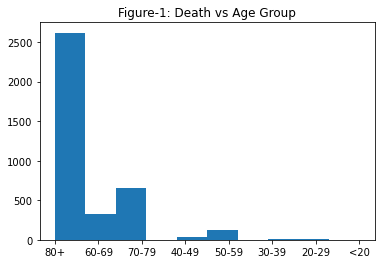

In [14]:
#6.1.1
#Plot a histogram showing the no. of deaths by age group
death = data.loc[(data['case_status'] == "Deceased") & (data['age_group'] != "Not Reported")]
plt.hist(death['age_group'])
plt.title("Figure-1: Death vs Age Group")
round(death['age_group'].value_counts()/death['age_group'].count()*100, 2); #rounding the data for better visiulizaton 

#### **Observation:**

One of our main objectives is to minimize deaths.  According to our analysis results as seen above, 98.84% of deaths are for people above the age of 50.  This shows us that vaccinations should focus on elderly people starting with the most elderly.

###6.2 ***Gender and Age Group vs Mortality Rate***

In [1]:
#6.2.1
#Depict age group and gender of people who died in the panademic
#d = death[['age_group','gender']].loc[(death['gender'] != "Not Reported")]
#c = d.value_counts(['gender','age_group']) 
#c.plot(kind = 'bar', title = "Figure-2 : No. of deaths by gender and age group ");



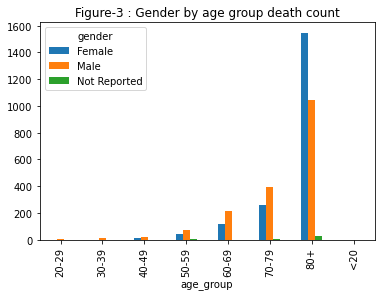

In [56]:
#6.2.2
#Pivot age and gender information
Gender_Analysis = pd.crosstab(index=death["age_group"], columns=death["gender"], values=death["case_status"], aggfunc="count").round(1) #crosstab helps us pivot the data
Gender_Analysis.plot(kind = 'bar', title = "Figure-3 : Gender by age group death count");

**Observation**: The number of Female deaths is significantly higher than Male in agegroups over 80. However the pattren is reversed in other age gorups. 

In [17]:
#6.2.3
data['gender'].value_counts(normalize=True)


Female          0.505920
Male            0.488133
Not Reported    0.005947
Name: gender, dtype: float64

In [18]:
#6.2.4
round(data.groupby(['age_group', 'gender'])['gender'].agg(['count'])/data.shape[0]*100, 2)

count
age_group gender             
20-29     Female         9.85
          Male          11.03
          Not Reported   0.13
30-39     Female         7.54
          Male           7.99
          Not Reported   0.08
40-49     Female         7.39
          Male           6.61
          Not Reported   0.09
50-59     Female         7.61
          Male           6.86
          Not Reported   0.07
60-69     Female         4.48
          Male           4.83
          Not Reported   0.03
70-79     Female         2.53
          Male           2.53
          Not Reported   0.03
80+       Female         5.38
          Male           2.62
          Not Reported   0.08
<20       Female         5.80
          Male           6.33
          Not Reported   0.09

**Observation**: Data is normally destributed among all age groups however for data for age group over 80 there are more than double number of females affected by Covid-19. 

In [2]:
#6.2.5
population_data=pd.read_csv('ON_Population_By_AGE_Gorups.csv')
population_data.head()


In [ ]:
#6.2.6
total_on_polulation = population_data.VALUE.sum()

In [ ]:
#6.2.7
round(population_data.groupby(['Age group', 'Sex'])['VALUE'].agg(['sum']) / total_on_polulation * 100, 2)

**Observation**: We can see there are signifecantly higher number of Female Population than Male Polulation in the age group over 80. 

**Conclusion**: By comparing the population size we can confirm the reason for higher death rates in females age over 80 is the higher female population in that age group. And in the lower age groups despite having almost similar population distribution death rate in Male population is significantly higher.


####6.3 ***Mortality rate related visualizations***

*Let's plot the map of Ontario so that we can visualize the results of our analysis on the go!*

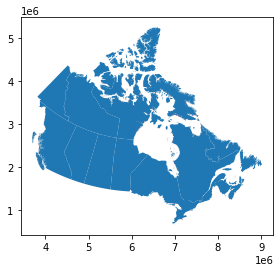

In [19]:
#6.3.1
#Plot the map of Canada from the respective .shp file
canada_map = gpd.read_file('lpr_000b16a_e.shp')
canada_map.loc[:, 'geometry'].plot();

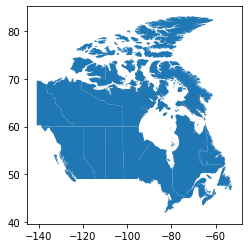

In [20]:
#6.3.2
#Convert it to the right CRS
province_label_map = canada_map.to_crs({'proj':'longlat', 'ellps':'WGS84', 'datum':'WGS84'})
province_label_map.plot();

In [21]:
#6.3.3
#Check the contents
province_label_map.head()

,PRUID,PRNAME,PRENAME,PRFNAME,PREABBR,PRFABBR,geometry
0,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,Newfoundland and Labrador,Terre-Neuve-et-Labrador,N.L.,T.-N.-L.,"MULTIPOLYGON (((-57.40258 54.14964, -57.38431 ..."
1,11,Prince Edward Island / Île-du-Prince-Édouard,Prince Edward Island,Île-du-Prince-Édouard,P.E.I.,Î.-P.-É.,"MULTIPOLYGON (((-61.98301 46.45775, -61.98137 ..."
2,12,Nova Scotia / Nouvelle-Écosse,Nova Scotia,Nouvelle-Écosse,N.S.,N.-É.,"MULTIPOLYGON (((-61.90234 45.87878, -61.90057 ..."
3,13,New Brunswick / Nouveau-Brunswick,New Brunswick,Nouveau-Brunswick,N.B.,N.-B.,"MULTIPOLYGON (((-64.80155 47.80365, -64.80155 ..."
4,24,Quebec / Québec,Quebec,Québec,Que.,Qc,"MULTIPOLYGON (((-58.64702 51.20815, -58.63989 ..."


In [22]:
#6.3.4
#Plot the map of Ontario:
ontario_map = province_label_map
ontario_map = ontario_map[ontario_map['PRENAME'] == 'Ontario']
ontario_map

,PRUID,PRNAME,PRENAME,PRFNAME,PREABBR,PRFABBR,geometry
5,35,Ontario,Ontario,Ontario,Ont.,Ont.,"MULTIPOLYGON (((-88.86612 56.84777, -88.86838 ..."


In [23]:
#6.3.5
#Set geometry points for Ontario:
ontario_map_points1 = ontario_map.copy()
ontario_map_points1.set_geometry(ontario_map["geometry"].representative_point(), inplace = True)

***6.4 COVID deaths by gender in "Ontario"***

In [24]:
#6.4.1
#Get points from the data set:
geometry = [Point(xy) for xy in zip(death['longitude'], death['latitude'])]
geometry[:3]

In [26]:
#6.4.2
#Set geo_death_df to point to the coordinates of "death" dataframe:
geo_death_df = gpd.GeoDataFrame(death, geometry = geometry)
geo_death_df.head()

,ObjectId,row_id,date_reported,health_region,age_group,gender,exposure,case_status,latitude,longitude,province,province_abbr,hr_uid,month,week,weekday,gender_label,age_group_label,case_status_label,geometry
256,257,2227,2020/10/30 12:00:00,Simcoe Muskoka District Health Unit,80+,Male,Not Reported,Deceased,44.777755,-79.545773,Ontario,ON,3560.0,10,44,4,1,6,1,POINT (-79.54577 44.77775)
290,291,2261,2020/10/16 12:00:00,Eastern Ontario Health Unit,80+,Female,Outbreak,Deceased,45.273060,-74.952579,Ontario,ON,3558.0,10,42,4,0,6,1,POINT (-74.95258 45.27306)
335,336,2306,2020/10/19 12:00:00,Peel Public Health,80+,Male,Close Contact,Deceased,43.761613,-79.813571,Ontario,ON,3553.0,10,43,0,1,6,1,POINT (-79.81357 43.76161)
445,446,2416,2020/09/09 12:00:00,Simcoe Muskoka District Health Unit,60-69,Male,Not Reported,Deceased,44.777755,-79.545773,Ontario,ON,3560.0,9,37,2,1,4,1,POINT (-79.54577 44.77775)
518,519,2489,2020/11/07 12:00:00,York Region Public Health Services,70-79,Male,Close Contact,Deceased,44.074977,-79.428212,Ontario,ON,3570.0,11,45,5,1,5,1,POINT (-79.42821 44.07498)


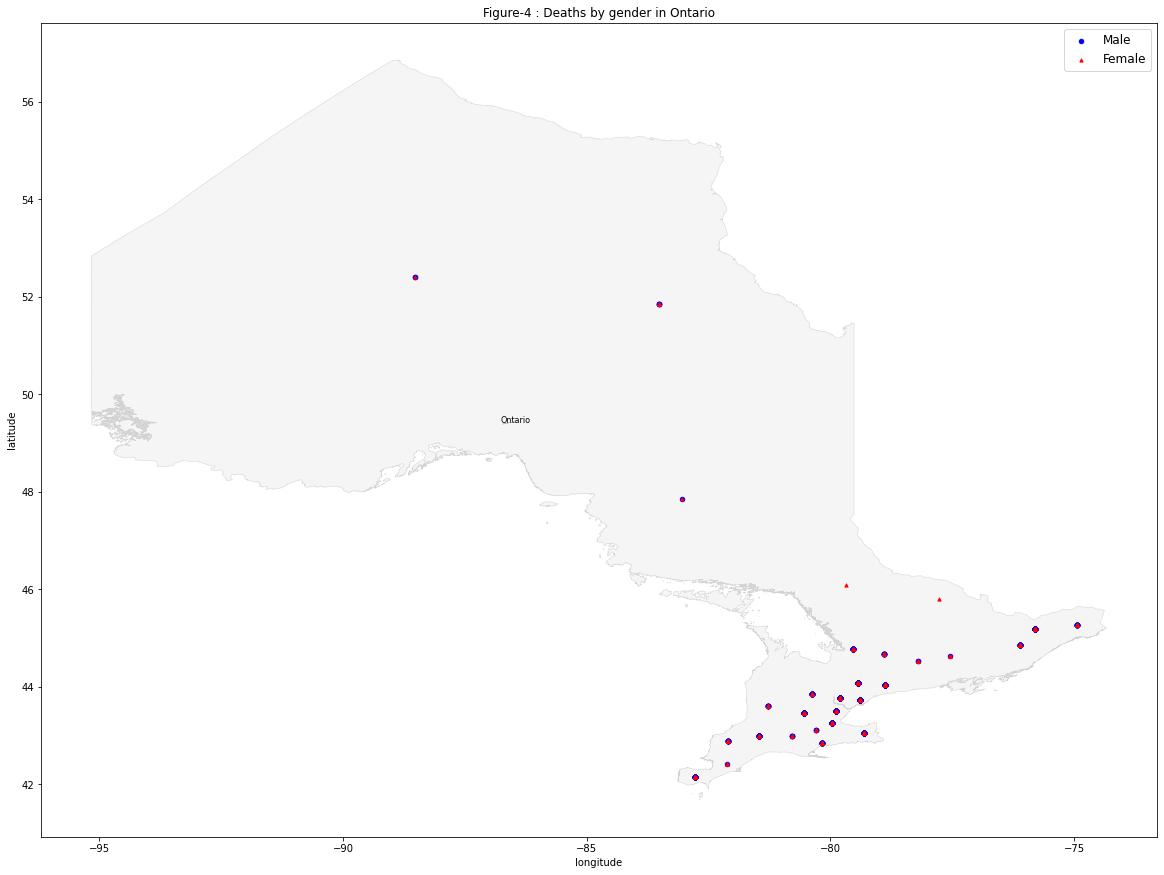

In [27]:
#6.4.3
#Plot deceased "Male and Female" population specifically in the province of "Ontario"
ax = ontario_map.plot(figsize = (20, 20), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)
texts = []

#Label the provinces
for x, y, label in zip(ontario_map_points1.geometry.x, ontario_map_points1.geometry.y, ontario_map_points1["PRENAME"]):
    texts.append(plt.text(x, y, label, fontsize = 8))

aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1), 
               arrowprops=dict(arrowstyle="-", color='grey', lw=0.5))


geo_death_df[(geo_death_df['gender'] == 'Male')].plot(ax = ax, markersize = 20, color = "blue", marker = "o", label = "Male")
geo_death_df[(geo_death_df['gender'] == 'Female')].plot(ax = ax, markersize = 10, color = "red", marker = "^", label = "Female")

plt.legend(prop={'size': 12})
plt.xlabel("longitude")
plt.ylabel("latitude");
plt.title("Figure-4 : Deaths by gender in Ontario");


These visualizations show us that a lot more females died compared to the male population in Canada.  When we look at Ontario specifically, we can see this difference very clearly.  Hence vaccine distribution should be prioritized for females over males.



###6.4 ***Exposure Type***

In [28]:
# 6.4.1
#Replacing the <20 to 0-19 for age group format to be the same
data.replace(to_replace = '<20', value="0-19",inplace = True)


/Users/bee/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [29]:
#6.4.2
data["pcount"]=np.ones(data.shape[0]) #updated the code to pervent legnth error.

<ipython-input-29-39afd7d3d226>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["pcount"]=np.ones(data.shape[0]) #updated the code to pervent legnth error.


In [30]:
#6.4.3
s = data.groupby(["exposure","case_status"]).count()["ObjectId"]
s

exposure        case_status
Close Contact   Active          5852
                Deceased         276
                Recovered      45779
Not Reported    Active          7888
                Deceased         519
                Recovered      36637
Outbreak        Active          1743
                Deceased        2908
                Recovered      22347
Travel-Related  Active            60
                Deceased          69
                Recovered       3213
Name: ObjectId, dtype: int64

In [31]:
#6.4.4
clean_data = data[~data['exposure'].isin(["Not Reported"])]

s1 = clean_data.groupby(["exposure","case_status"]).count()["ObjectId"]
s1

exposure        case_status
Close Contact   Active          5852
                Deceased         276
                Recovered      45779
Outbreak        Active          1743
                Deceased        2908
                Recovered      22347
Travel-Related  Active            60
                Deceased          69
                Recovered       3213
Name: ObjectId, dtype: int64

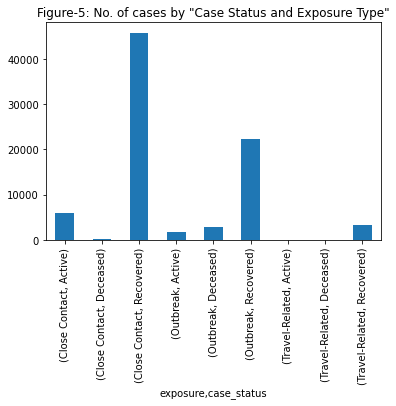

In [32]:
#6.4.5
clean_data2 = clean_data[~clean_data['case_status'].isin(["Not Reported"])]
s2 = clean_data.groupby(["exposure","case_status"]).count()["pcount"]

s2.plot(x="ObjectId",y="exposure", kind = "bar", title = "Figure-5: No. of cases by \"Case Status and Exposure Type\"");

In [33]:
#6.4.6
s3 = clean_data2.groupby('exposure').count()['pcount']
s3

exposure
Close Contact     51907
Outbreak          26998
Travel-Related     3342
Name: pcount, dtype: int64

In [34]:
#6.4.7
h = clean_data2.groupby(["exposure","case_status"]).count()["pcount"].reset_index()
h['exposure total'] = h['exposure']
h['exposure total'].replace(to_replace =["Close Contact","Outbreak","Travel-Related"],value = s3.values.tolist(), inplace=True)
h['percentage'] = h['pcount']/h['exposure total']
h[['exposure','case_status','percentage']]

,exposure,case_status,percentage
0,Close Contact,Active,0.112740
1,Close Contact,Deceased,0.005317
2,Close Contact,Recovered,0.881943
3,Outbreak,Active,0.064560
4,Outbreak,Deceased,0.107712
5,Outbreak,Recovered,0.827728
6,Travel-Related,Active,0.017953
7,Travel-Related,Deceased,0.020646
8,Travel-Related,Recovered,0.961400


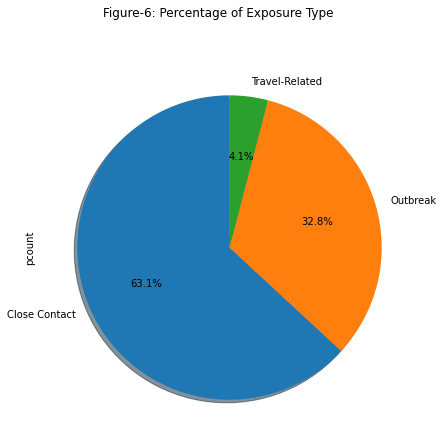

In [35]:
#6.4.8
s3.plot(kind='pie', subplots=True, shadow = True,startangle=90,
figsize=(12,7), autopct='%1.1f%%', title = "Figure-6: Percentage of Exposure Type");

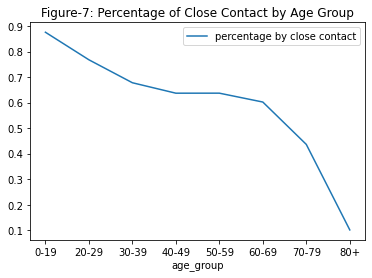

In [36]:
#6.4.9
Total_by_age = clean_data2.groupby(['age_group']).count()['ObjectId']
close_contact = clean_data2[clean_data2['exposure']=="Close Contact"].groupby(['age_group','exposure']).count()['pcount']
percentage_close_contact = close_contact[0:8]/Total_by_age[0:8]

d = pd.DataFrame(percentage_close_contact)
d.reset_index(level=0, inplace=True)
d.reset_index(level=0, inplace=True)
d.columns=['exposure','age_group','percentage by close contact']
d.plot(x="age_group",y="percentage by close contact", kind = "line", title = "Figure-7: Percentage of Close Contact by Age Group");

In [37]:
#6.4.10
clean_data2.groupby(['age_group','exposure']).count()['ObjectId']


age_group  exposure      
0-19       Close Contact     10365
           Outbreak           1336
           Travel-Related      137
20-29      Close Contact     12403
           Outbreak           3096
           Travel-Related      658
30-39      Close Contact      7838
           Outbreak           3231
           Travel-Related      496
40-49      Close Contact      6852
           Outbreak           3409
           Travel-Related      499
50-59      Close Contact      7223
           Outbreak           3526
           Travel-Related      592
60-69      Close Contact      4404
           Outbreak           2383
           Travel-Related      527
70-79      Close Contact      1926
           Outbreak           2150
           Travel-Related      340
80+        Close Contact       896
           Outbreak           7867
           Travel-Related       93
Name: ObjectId, dtype: int64

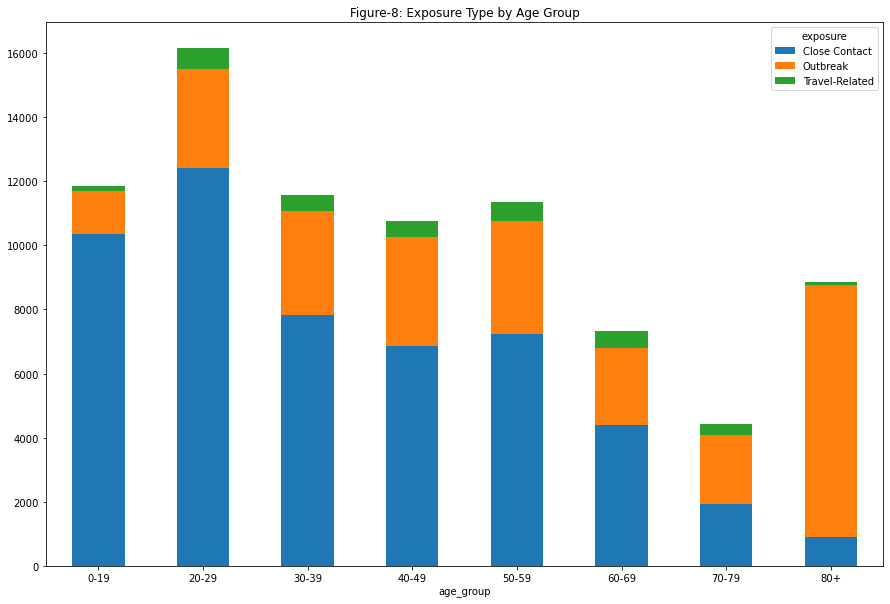

In [38]:
#6.4.11
pd.crosstab(clean_data2["age_group"], clean_data2["exposure"]).plot(kind='bar', stacked=True, rot=0, figsize=(15, 10), title = "Figure-8: Exposure Type by Age Group");

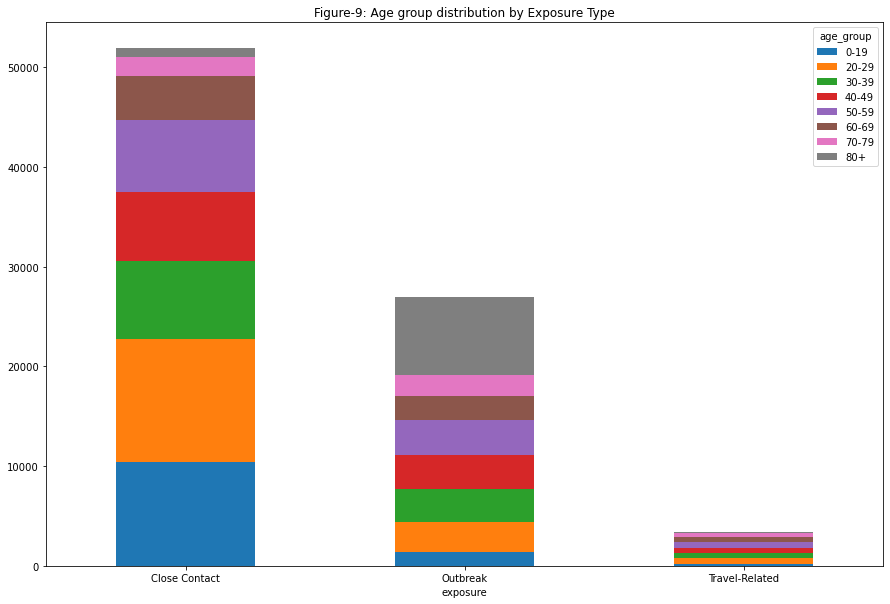

In [39]:
#6.4.12
#Both Genders
pd.crosstab(clean_data2["exposure"], clean_data2["age_group"]).plot(kind='bar', stacked=True, rot=0, figsize=(15, 10), title = "Figure-9: Age group distribution by Exposure Type");

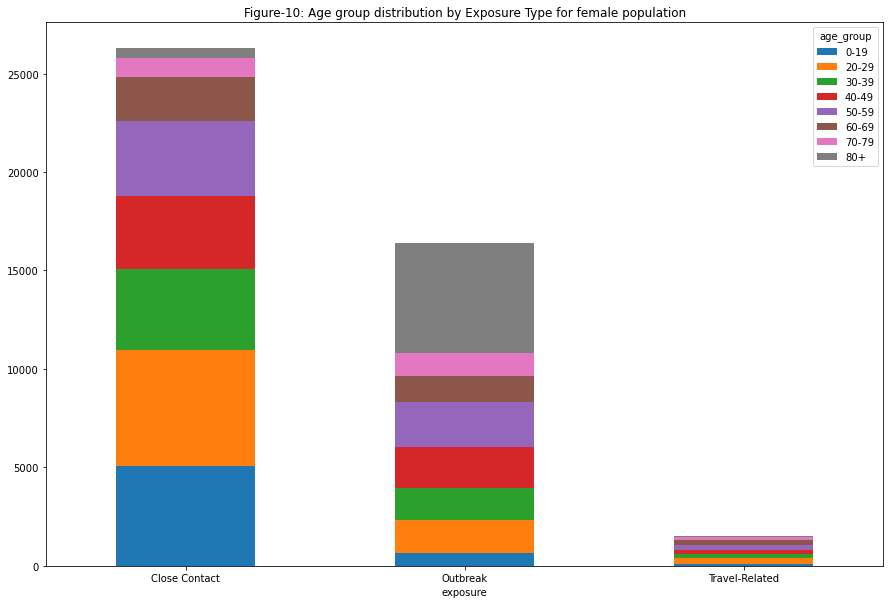

In [40]:
#6.4.13
#Females only
pd.crosstab((clean_data2[~clean_data2['gender'].isin(["Male"])])["exposure"], clean_data2["age_group"]).plot(kind='bar', stacked=True, rot=0, figsize=(15, 10), title = "Figure-10: Age group distribution by Exposure Type for female population");


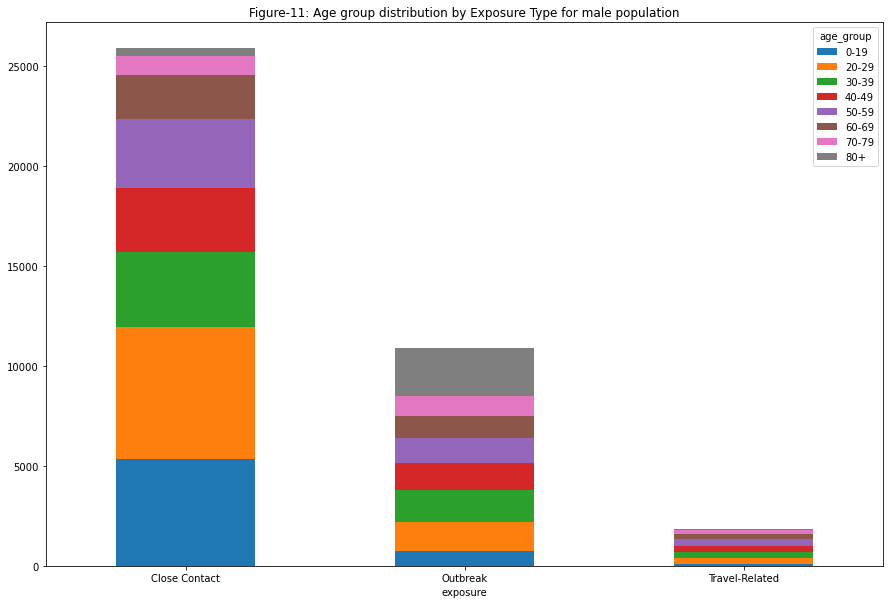

In [41]:
#6.4.14
#Males only
pd.crosstab((clean_data2[~clean_data2['gender'].isin(["Female"])])["exposure"], clean_data2["age_group"]).plot(kind='bar', stacked=True, rot=0, figsize=(15, 10), title = "Figure-11: Age group distribution by Exposure Type for male population");

#### **Observation:**



Younger generation, particularly <29, contribute much more significantly to exposure type by close contact, likely showing that this age group is contributing the most in the spread of the virus. 

Gender has no impact on the likelihood of infection by any exposure type and has no impact on breakdown of exposure type by age group calssification. 

###6.5 ***Health Region***


In [42]:
#6.5.1
#Create a cross tabulation of "case status, total no. of cases and odds of survival" by each health region
Health_Region = pd.crosstab(index=data['health_region'], columns=data['case_status'], values=data['case_status'], aggfunc='count')
Health_Region['Total Number of Cases'] = Health_Region['Active'] + Health_Region['Deceased']  + Health_Region['Recovered']
Health_Region['Odds of Survival'] = (Health_Region['Recovered']/(Health_Region['Recovered']+Health_Region['Deceased']))*100


In [43]:
#6.5.2
#Create custom zones for each health region
def zone(Health_Region):
    var = ""
    if Health_Region['Active'] >= 1000:
        var = 'Red Zone'
    elif ((Health_Region['Active'] > 500) & (Health_Region['Active'] < 1000)):
        var = 'Yellow Zone'
    elif Health_Region['Active'] <= 500:
        var = 'Green Zone'
    else:
        var = 'NA'
    return var

In [44]:
#6.5.3
Health_Region['Severity Zone'] = Health_Region.apply(zone,axis=1) 

In [45]:
#6.5.4
#Find out which health regions have the highest no. of active cases
Health_Region.sort_values(by=['Active'], ascending=False).head(5)

case_status,Active,Deceased,Recovered,Total Number of Cases,Odds of Survival,Severity Zone
health_region,,,,,,
Toronto Public Health,4935.0,1640.0,36388.0,42963.0,95.687388,Red Zone
Peel Public Health,4526.0,383.0,23318.0,28227.0,98.384034,Red Zone
York Region Public Health Services,1330.0,324.0,10273.0,11927.0,96.942531,Red Zone
Durham Region Health Department,639.0,192.0,4101.0,4932.0,95.527603,Yellow Zone
Hamilton Public Health Services,585.0,94.0,2891.0,3570.0,96.850921,Yellow Zone


In [46]:
#6.5.5
#Find out which health regions have highest odds of survival
Health_Region.sort_values(by=['Odds of Survival'], ascending=True).head(5)

case_status,Active,Deceased,Recovered,Total Number of Cases,Odds of Survival,Severity Zone
health_region,,,,,,
"Leeds, Grenville and Lanark District Health Unit",34.0,53.0,434.0,521.0,89.117043,Green Zone
Porcupine Health Unit,8.0,9.0,99.0,116.0,91.666667,Green Zone
"Haliburton, Kawartha, Pine Ridge District Health Unit",38.0,21.0,284.0,343.0,93.114754,Green Zone
Lambton Public Health,21.0,25.0,381.0,427.0,93.842365,Green Zone
Haldimand-Norfolk Health Unit,34.0,37.0,585.0,656.0,94.051447,Green Zone


In [47]:
#6.5.6
#Order health regions by the highest total no. of cases
Health_Region.sort_values(by=['Total Number of Cases'], ascending=False).head(5)

case_status,Active,Deceased,Recovered,Total Number of Cases,Odds of Survival,Severity Zone
health_region,,,,,,
Toronto Public Health,4935.0,1640.0,36388.0,42963.0,95.687388,Red Zone
Peel Public Health,4526.0,383.0,23318.0,28227.0,98.384034,Red Zone
York Region Public Health Services,1330.0,324.0,10273.0,11927.0,96.942531,Red Zone
Ottawa Public Health,420.0,379.0,7976.0,8775.0,95.463794,Green Zone
Durham Region Health Department,639.0,192.0,4101.0,4932.0,95.527603,Yellow Zone


#### **Observation:**

Toronto Public Health Region is the first region that should receive the vaccine as it has the highest count of overall cases and is in the "Red Zone" with over 4043 active cases.  

###6.6 ***Health Region related visualizations***

In [48]:
#6.6.1
#Create a df with health region coordinates
health_region_coords= data.groupby(['health_region'])[["latitude", "longitude"]].max()

In [49]:
#6.6.2
#Merge latitude and longitudes from the base table
Health_Region = Health_Region.merge(health_region_coords, how='inner', left_on=["health_region"], right_on=["health_region"])
Health_Region.head()

,Active,Deceased,Recovered,Total Number of Cases,Odds of Survival,Severity Zone,latitude,longitude
health_region,,,,,,,,
Algoma Public Health Unit,1.0,NaN,60.0,NaN,NaN,Green Zone,47.596789,-84.412469
Brant County Health Unit,57.0,6.0,575.0,638.0,98.967298,Green Zone,43.120346,-80.295389
Chatham-Kent Health Unit,31.0,4.0,488.0,523.0,99.186992,Green Zone,42.419253,-82.128088
Durham Region Health Department,639.0,192.0,4101.0,4932.0,95.527603,Yellow Zone,44.035150,-78.882498
Eastern Ontario Health Unit,140.0,40.0,754.0,934.0,94.962217,Green Zone,45.273060,-74.952579


In [50]:
#6.6.3
#Get points from the "Health_Region" data set:
geometry = [Point(xy) for xy in zip(Health_Region['longitude'], Health_Region['latitude'])]
geometry[:3]

In [51]:
#6.6.4
#Set geo_health_region_df to point to the coordinates of "Health_Region" dataframe:
geo_health_region_df = gpd.GeoDataFrame(Health_Region, geometry = geometry)
geo_health_region_df.head()

,Active,Deceased,Recovered,Total Number of Cases,Odds of Survival,Severity Zone,latitude,longitude,geometry
health_region,,,,,,,,,
Algoma Public Health Unit,1.0,NaN,60.0,NaN,NaN,Green Zone,47.596789,-84.412469,POINT (-84.41247 47.59679)
Brant County Health Unit,57.0,6.0,575.0,638.0,98.967298,Green Zone,43.120346,-80.295389,POINT (-80.29539 43.12035)
Chatham-Kent Health Unit,31.0,4.0,488.0,523.0,99.186992,Green Zone,42.419253,-82.128088,POINT (-82.12809 42.41925)
Durham Region Health Department,639.0,192.0,4101.0,4932.0,95.527603,Yellow Zone,44.035150,-78.882498,POINT (-78.88250 44.03515)
Eastern Ontario Health Unit,140.0,40.0,754.0,934.0,94.962217,Green Zone,45.273060,-74.952579,POINT (-74.95258 45.27306)


In [52]:
#6.6.5
#Reset index to plot the health regions:
geo_health_region_df = geo_health_region_df.reset_index()
geo_health_region_df

,health_region,Active,Deceased,Recovered,Total Number of Cases,Odds of Survival,Severity Zone,latitude,longitude,geometry
0,Algoma Public Health Unit,1.0,NaN,60.0,NaN,NaN,Green Zone,47.596789,-84.412469,POINT (-84.41247 47.59679)
1,Brant County Health Unit,57.0,6.0,575.0,638.0,98.967298,Green Zone,43.120346,-80.295389,POINT (-80.29539 43.12035)
2,Chatham-Kent Health Unit,31.0,4.0,488.0,523.0,99.186992,Green Zone,42.419253,-82.128088,POINT (-82.12809 42.41925)
3,Durham Region Health Department,639.0,192.0,4101.0,4932.0,95.527603,Yellow Zone,44.035150,-78.882498,POINT (-78.88250 44.03515)
4,Eastern Ontario Health Unit,140.0,40.0,754.0,934.0,94.962217,Green Zone,45.273060,-74.952579,POINT (-74.95258 45.27306)
5,Grey Bruce Health Unit,35.0,NaN,308.0,NaN,NaN,Green Zone,44.408279,-81.008611,POINT (-81.00861 44.40828)
6,Haldimand-Norfolk Health Unit,34.0,37.0,585.0,656.0,94.051447,Green Zone,42.854447,-80.178035,POINT (-80.17804 42.85445)
7,"Haliburton, Kawartha, Pine Ridge District Heal...",38.0,21.0,284.0,343.0,93.114754,Green Zone,44.671238,-78.897222,POINT (-78.89722 44.67124)
8,Halton Region Health Department,471.0,67.0,3274.0,3812.0,97.994612,Green Zone,43.512097,-79.890508,POINT (-79.89051 43.51210)
9,Hamilton Public Health Services,585.0,94.0,2891.0,3570.0,96.850921,Yellow Zone,43.253243,-79.958463,POINT (-79.95846 43.25324)


***a) Province with the highest and lowest no. of "Active cases" cases in Ontario***

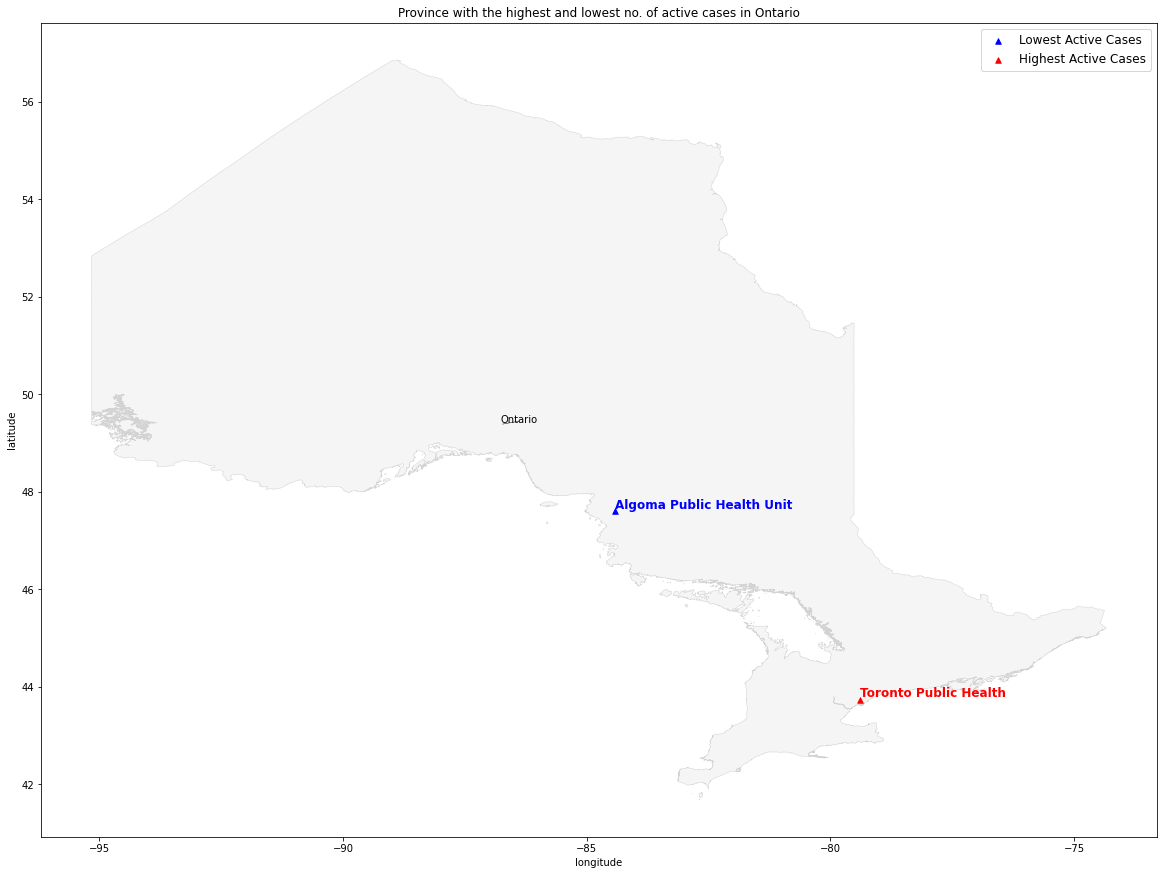

In [53]:
#6.6.6
#Province with lowest and highest no. of active cases in Canada
ax = ontario_map.plot(figsize = (20, 20), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)
texts = []
texts1 = []

#Label the name of the province:
for x, y, label in zip(ontario_map_points1.geometry.x, ontario_map_points1.geometry.y, ontario_map_points1["PRENAME"]):
    texts.append(plt.text(x, y, label, fontsize = 10))

aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1), 
               arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

#Label the region with min active cases
min_region = geo_health_region_df[geo_health_region_df['Active'] == geo_health_region_df['Active'].min()]
min_points1 = min_region.copy()
min_points1.set_geometry(min_region["geometry"].representative_point(), inplace = True)

#Plot the min point on the map
min_region.plot(ax = ax, markersize = 30, color = "blue", marker = "^", label = "Lowest Active Cases")
for x, y, label in zip(min_points1.geometry.x, min_points1.geometry.y, min_region["health_region"]):
    texts1.append(plt.text(x, y, label, size = 12, fontweight="bold", color="blue"))
    
#Label the region with max active cases    
max_region = geo_health_region_df[geo_health_region_df['Active'] == geo_health_region_df['Active'].max()]    
max_points1 = max_region.copy()
max_points1.set_geometry(max_region["geometry"].representative_point(), inplace = True)

#Plot the max point on the map
max_region.plot(ax = ax, markersize = 30, color = "red", marker = "^", label = "Highest Active Cases")
for x, y, label in zip(max_points1.geometry.x, max_points1.geometry.y, max_region["health_region"]):
    texts1.append(plt.text(x, y, label, size = 12, fontweight="bold", color="red"))    

#Display data point labels on the map    
aT.adjust_text(texts1, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1), fontsize=12)
  
plt.legend(prop={'size': 12})
plt.xlabel("longitude")
plt.ylabel("latitude");
plt.title('Province with the highest and lowest no. of active cases in Ontario');

**"Toronto Public Health"**  has the highest no. of active cases in Canada and **"Algoma Public Health Unit"** in Ontario has the lowest active case of 1. 

***b) Health region severity zones in the province of Ontario***

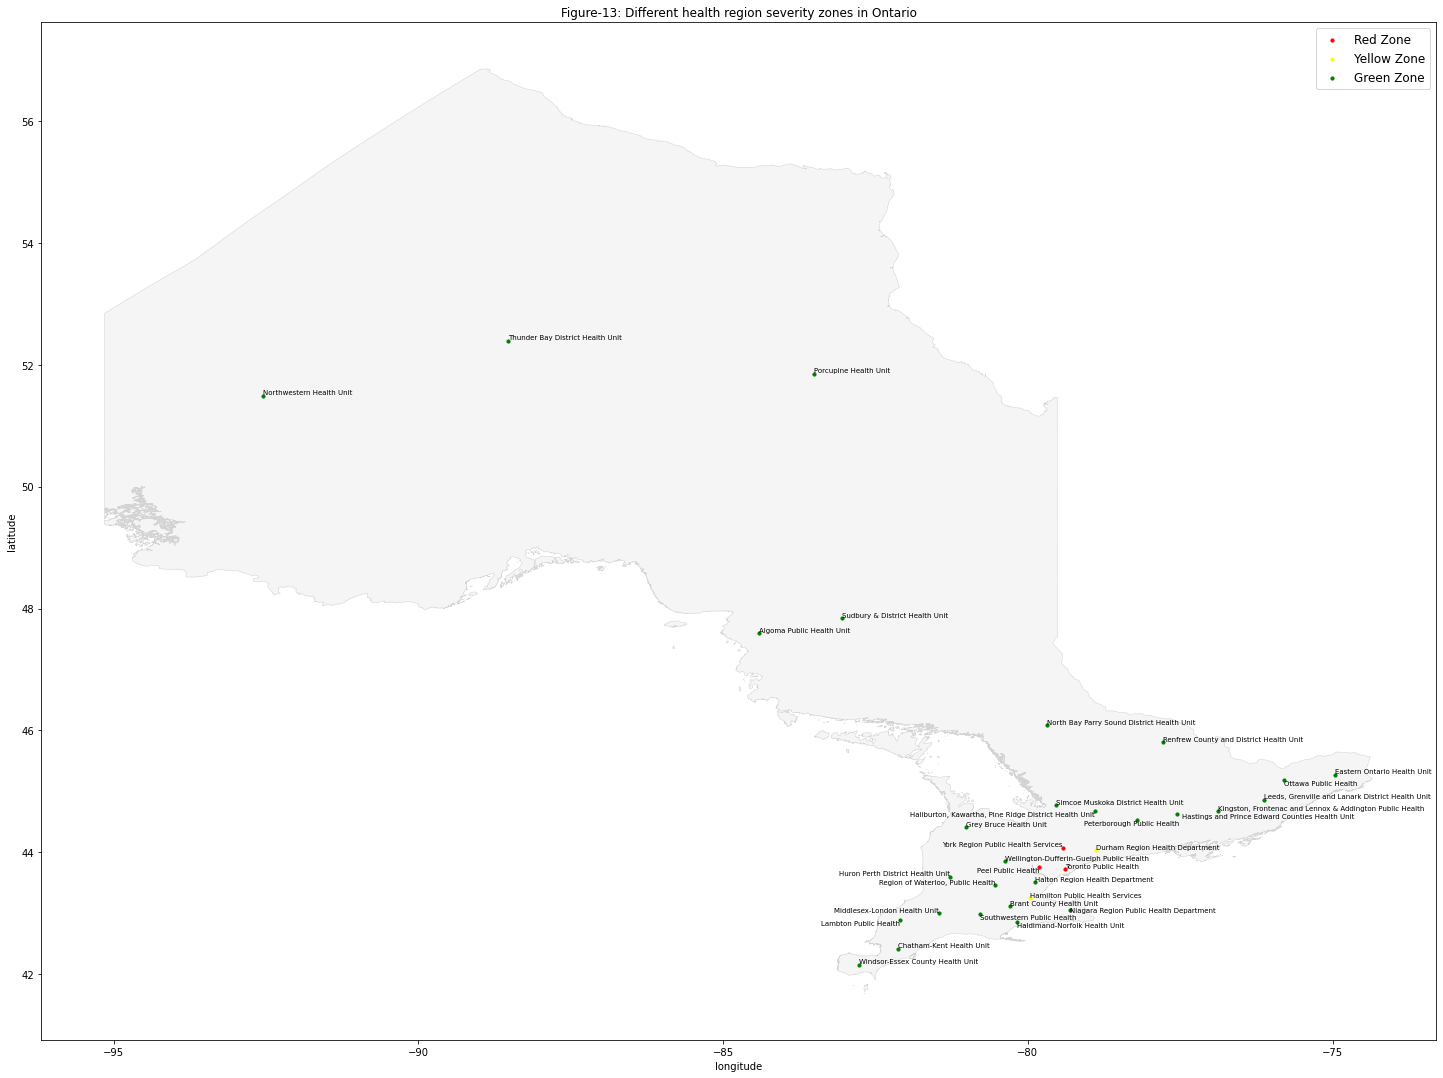

In [54]:
#6.6.7
#Health region severity zones in Ontario
ax = ontario_map.plot(figsize = (25, 25), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)
texts = []
texts1 = []

#Define regions with different zones:    
severity_red_zone_df = geo_health_region_df[(geo_health_region_df['Severity Zone'] == "Red Zone")]
severity_yellow_zone_df = geo_health_region_df[(geo_health_region_df['Severity Zone'] == "Yellow Zone")]
severity_green_zone_df = geo_health_region_df[(geo_health_region_df['Severity Zone'] == "Green Zone")]

severity_zone_df = severity_red_zone_df
severity_zone_df = severity_zone_df.append(severity_yellow_zone_df)
severity_zone_df = severity_zone_df.append(severity_green_zone_df)

#Set geometry for data points:
zone_points1 = severity_zone_df.copy()
zone_points1.set_geometry(severity_zone_df["geometry"].representative_point(), inplace = True)

#Plot data points on the map
severity_red_zone_df.plot(ax = ax, markersize = 10, color = "red", marker = "o", label = "Red Zone")
severity_yellow_zone_df.plot(ax = ax, markersize = 10, color = "yellow", marker = "o", label = "Yellow Zone")
severity_green_zone_df.plot(ax = ax, markersize = 10, color = "green", marker = "o", label = "Green Zone")

#Display data point labels on the map 
for x, y, label in zip(zone_points1.geometry.x, zone_points1.geometry.y, severity_zone_df['health_region']):
    texts1.append(plt.text(x, y, label, size=7))          
aT.adjust_text(texts1, force_points=0.3, force_text=0.7, expand_points=(1,1), expand_text=(1,1), fontsize=12)
     
plt.legend(prop={'size': 12})
plt.xlabel("longitude")
plt.ylabel("latitude");
plt.title('Figure-13: Different health region severity zones in Ontario');

***Toronto Public Health, Peel Public Health and York Region Public Health Services*** are the red zone areas in Ontario with the highest no. of active cases reported.  Toronto Public Health is the health region that needs to be first on the list for vaccine distribution.  